In [1]:
import pandas as pd
import league_data_fetcher
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
fpl = league_data_fetcher.Fetcher(0.05, 62649, 1)

Status code: 200
Page #1 saved, sleeping for 0.05 s
Status code: 200
Page #2 saved, sleeping for 0.05 s
Status code: 200
Page #3 saved, sleeping for 0.05 s
Status code: 200
Page #4 saved, sleeping for 0.05 s
Status code: 200
Page #5 saved, sleeping for 0.05 s
Status code: 200
Page #6 saved, sleeping for 0.05 s
Status code: 200
Page #7 saved, sleeping for 0.05 s
Status code: 200
Page #8 saved, sleeping for 0.05 s
Status code: 200
Page #9 saved, sleeping for 0.05 s
Status code: 200
Page #10 saved, sleeping for 0.05 s
Status code: 200
Page #11 saved, sleeping for 0.05 s
Status code: 200
Page #12 saved, sleeping for 0.05 s
Status code: 200
Page #13 saved, sleeping for 0.05 s
Status code: 200
Page #14 saved, sleeping for 0.05 s
Status code: 200
Page #15 saved, sleeping for 0.05 s
Status code: 200
Page #16 saved, sleeping for 0.05 s
Status code: 200
Page #17 saved, sleeping for 0.05 s
Status code: 200
Page #18 saved, sleeping for 0.05 s
Status code: 200
Page #19 saved, sleeping for 0.05 s
St

In [3]:
df_dict = {}

df_dict['team_name'] = [v.team_name for v in fpl.team_dict.values()]
df_dict['entry'] = [v.entry for v in fpl.team_dict.values()]
df_dict['country'] = [v.country for v in fpl.team_dict.values()]
df_dict['total_points'] = [v.aggregate('total_points', 'sum') for v in fpl.team_dict.values()]
df_dict['was_home'] = [v.aggregate('was_home', 'sum') for v in fpl.team_dict.values()]
df_dict['minutes'] = [v.aggregate('minutes', 'sum') for v in fpl.team_dict.values()]
df_dict['goals_scored'] = [v.aggregate('goals_scored', 'sum') for v in fpl.team_dict.values()]
df_dict['assists'] = [v.aggregate('assists', 'sum') for v in fpl.team_dict.values()]
df_dict['clean_sheets'] = [v.aggregate('clean_sheets', 'sum') for v in fpl.team_dict.values()]
df_dict['goals_conceded'] = [v.aggregate('goals_conceded', 'sum') for v in fpl.team_dict.values()]
df_dict['own_goals'] = [v.aggregate('own_goals', 'sum') for v in fpl.team_dict.values()]
df_dict['penalties_saved'] = [v.aggregate('penalties_saved', 'sum') for v in fpl.team_dict.values()]
df_dict['penalties_missed'] = [v.aggregate('penalties_missed', 'sum') for v in fpl.team_dict.values()]
df_dict['yellow_cards'] = [v.aggregate('yellow_cards', 'sum') for v in fpl.team_dict.values()]
df_dict['red_cards'] = [v.aggregate('red_cards', 'sum') for v in fpl.team_dict.values()]
df_dict['saves'] = [v.aggregate('saves', 'sum') for v in fpl.team_dict.values()]
df_dict['bonus'] = [v.aggregate('bonus', 'sum') for v in fpl.team_dict.values()]
df_dict['bps'] = [v.aggregate('bps', 'sum') for v in fpl.team_dict.values()]
df_dict['influence'] = [v.aggregate('influence', 'sum') for v in fpl.team_dict.values()]
df_dict['creativity'] = [v.aggregate('creativity', 'sum') for v in fpl.team_dict.values()]
df_dict['threat'] = [v.aggregate('threat', 'sum') for v in fpl.team_dict.values()]
df_dict['ict_index'] = [v.aggregate('ict_index', 'sum') for v in fpl.team_dict.values()]
df_dict['starts'] = [v.aggregate('starts', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goals'] = [v.aggregate('expected_goals', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_assists'] = [v.aggregate('expected_assists', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goal_involvements'] = [v.aggregate('expected_goal_involvements', 'sum') for v in fpl.team_dict.values()]
df_dict['expected_goals_conceded'] = [v.aggregate('expected_goals_conceded', 'sum') for v in fpl.team_dict.values()]
df_dict['value'] = [v.aggregate('value', 'sum') for v in fpl.team_dict.values()]
df_dict['xp'] = [v.aggregate('xp', 'sum') for v in fpl.team_dict.values()]
df_dict['wox'] = [v.aggregate('wox', 'sum') for v in fpl.team_dict.values()]

In [4]:
df = pd.DataFrame(df_dict)

In [6]:
df.to_pickle('league_62649_gw_1.pickle')

In [7]:
import pickle
with open('fpl_obj_league_62649_gw_1.pickle', 'wb') as f:
    pickle.dump(fpl, f)

In [12]:
sns.set(rc={'figure.figsize':(16,9), "figure.dpi":300, 'savefig.dpi':300})

R-squared value: 0.1209


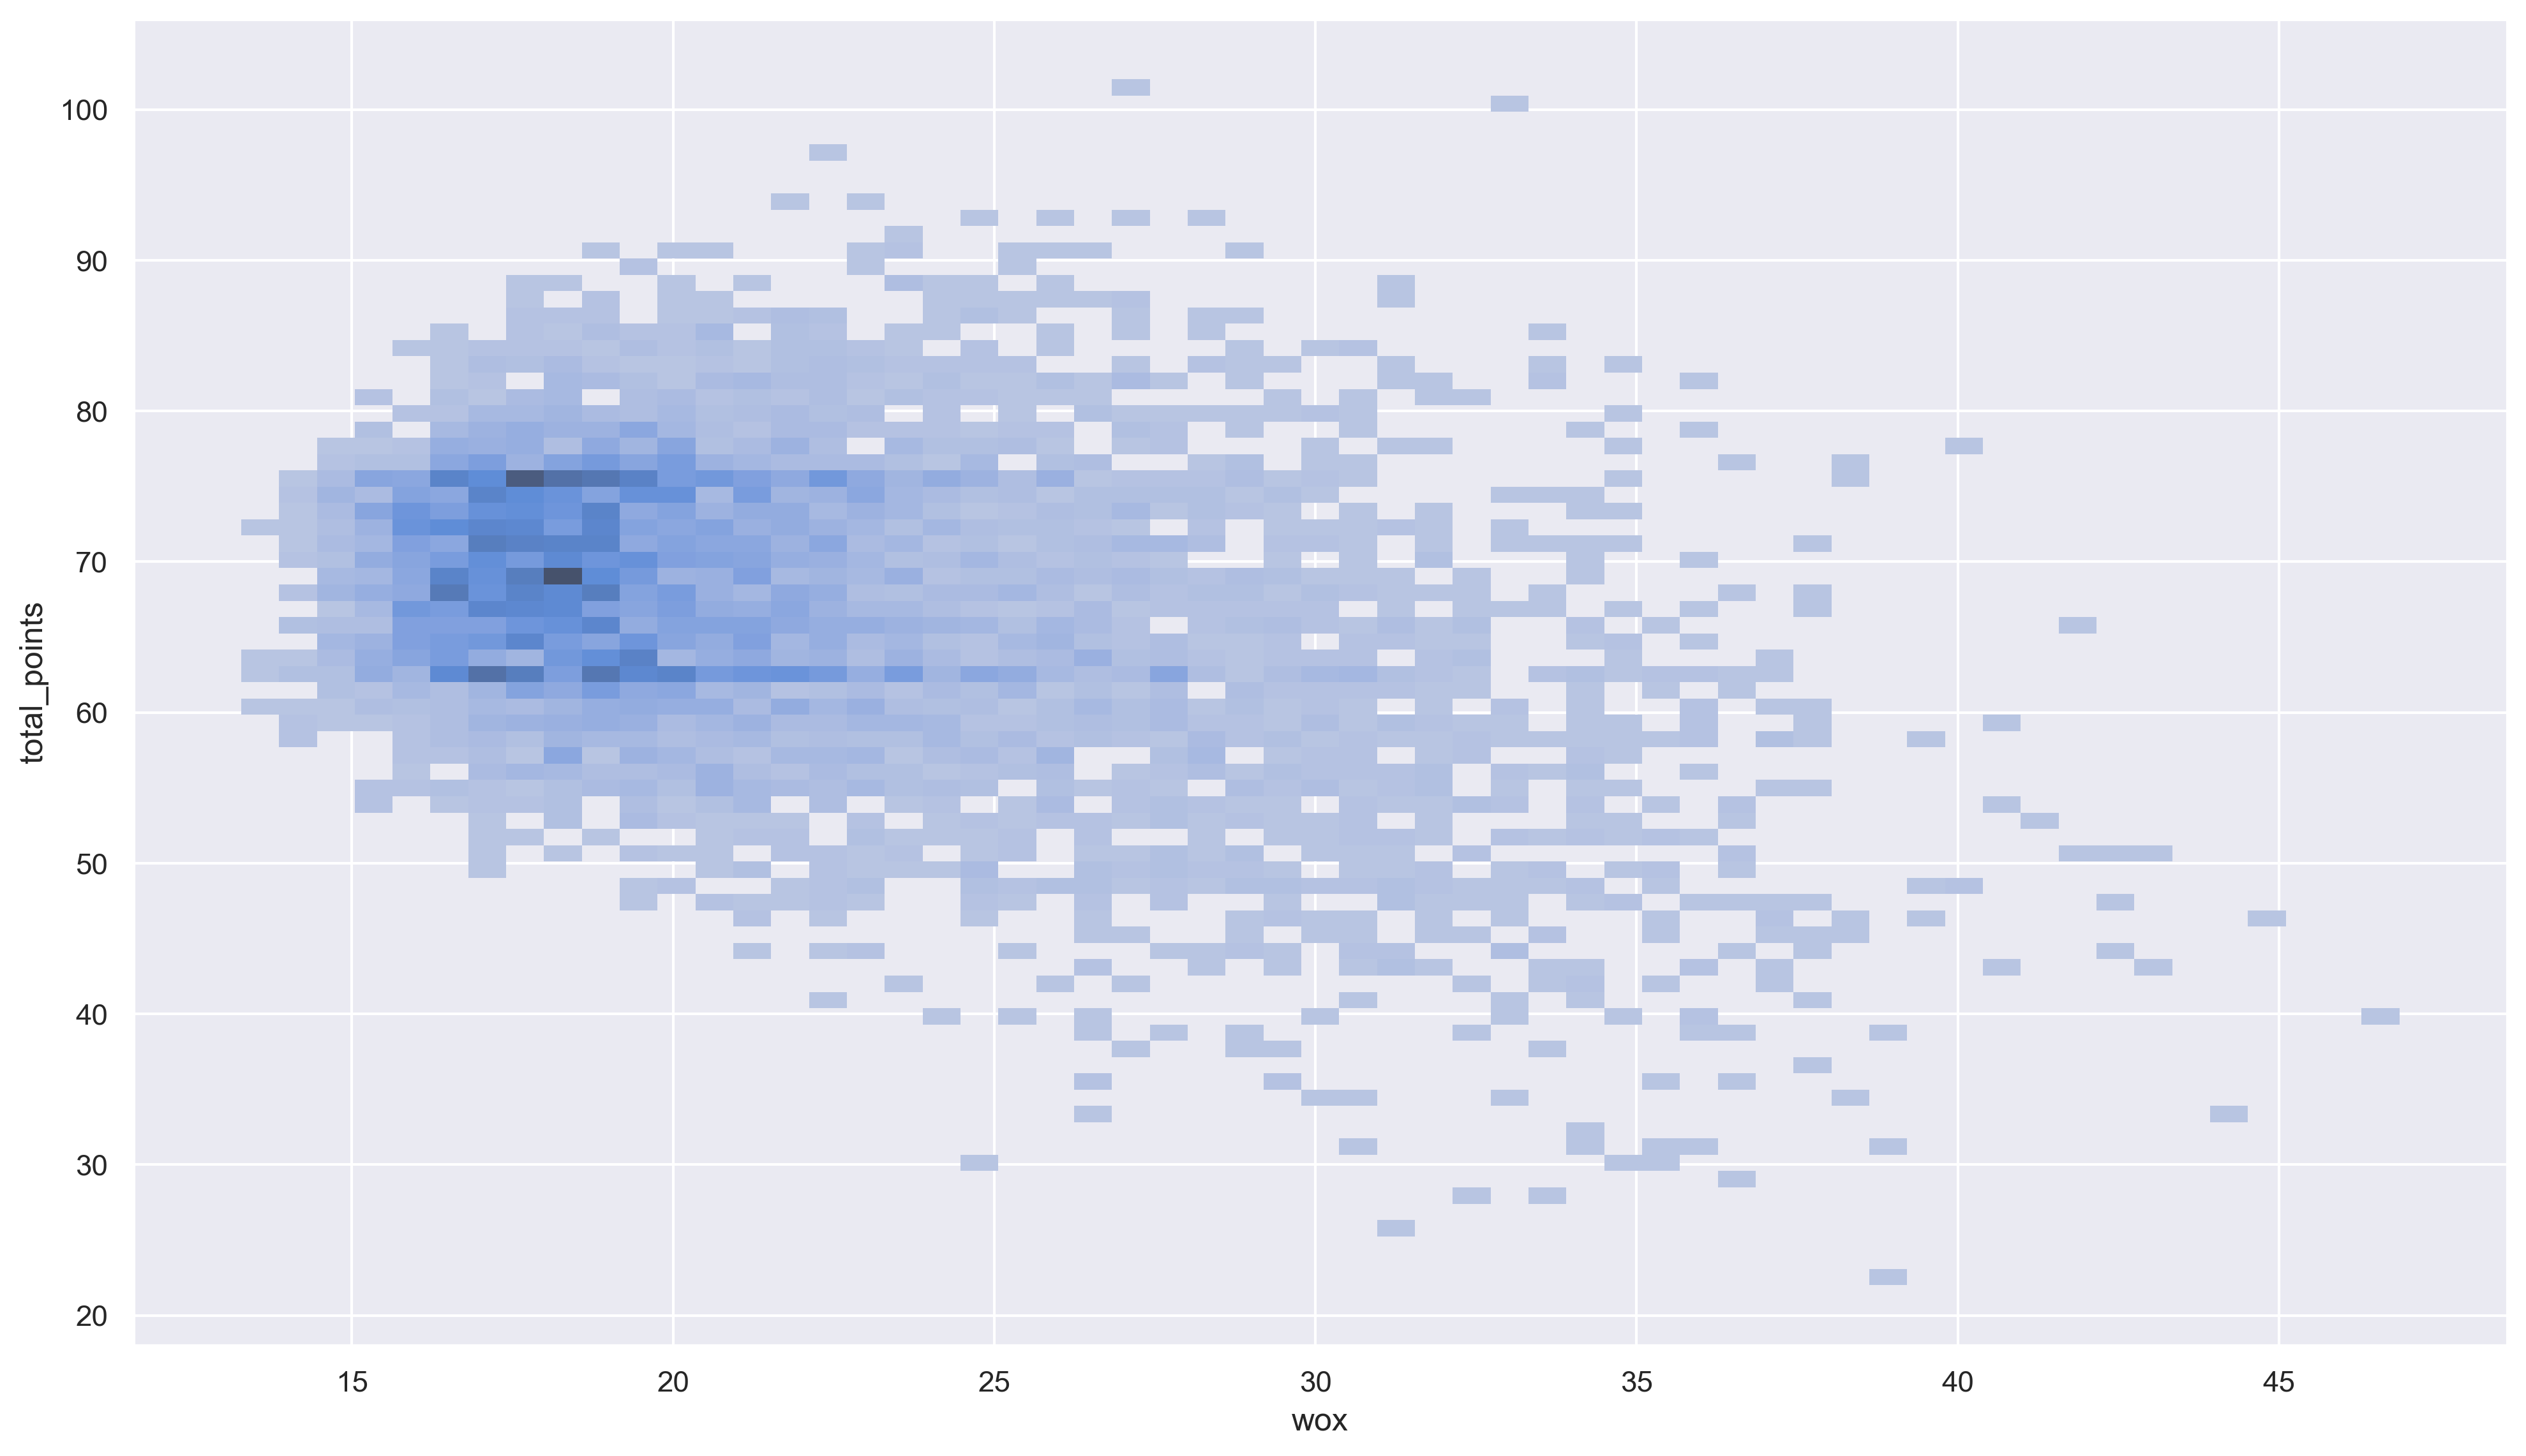

In [13]:
sns.histplot(data=df, x='wox', y='total_points')
slope, intercept, r_value, p_value, std_err = linregress(df['wox'], df['total_points'])
r_squared = r_value ** 2

print(f"R-squared value: {r_squared:.4f}")

plt.show()

In [35]:
fpl.team_dict[21482].df_unique

,entry,player,unique
77850,21482,275,0.970612
77851,21482,206,0.895419
77852,21482,405,0.846495
77853,21482,398,0.757511
77854,21482,19,0.105073
77855,21482,396,0.199146
77856,21482,226,0.867509
77857,21482,353,0.746183
77858,21482,509,0.824167
77859,21482,355,0.031358


In [81]:
fpl.player_dict[290].second_name

'Alexander-Arnold'

In [85]:
df_test = fpl.df_groupby.copy()
df_test.reset_index(inplace=True)

In [89]:
df_test['xp'] = df_test['player'].apply(lambda x: fpl.player_dict[x].xp)
df_test['unique'] = df_test['player'].apply(lambda x: fpl.player_dict[x].uniqueness)
df_test['total_points'] = df_test['player'].apply(lambda x: fpl.player_dict[x].total_points)
df_test['wux'] = df_test['unique'] * df_test['xp']

In [90]:
df_test

,player,entry,unique,xp,total_points,wux
0,355,5901,0.031358,5.5,13,0.172468
1,19,5452,0.105073,3.4,10,0.357248
2,131,5215,0.143983,2.8,7,0.403152
3,396,4879,0.199146,3.5,3,0.697012
4,5,4031,0.338368,2.8,1,0.947431
...,...,...,...,...,...,...
443,115,1,1.000000,2.1,1,2.100000
444,110,1,1.000000,2.1,2,2.100000
445,107,1,1.000000,1.6,0,1.600000
446,105,1,1.000000,2.1,2,2.100000


R-squared value: 0.1075


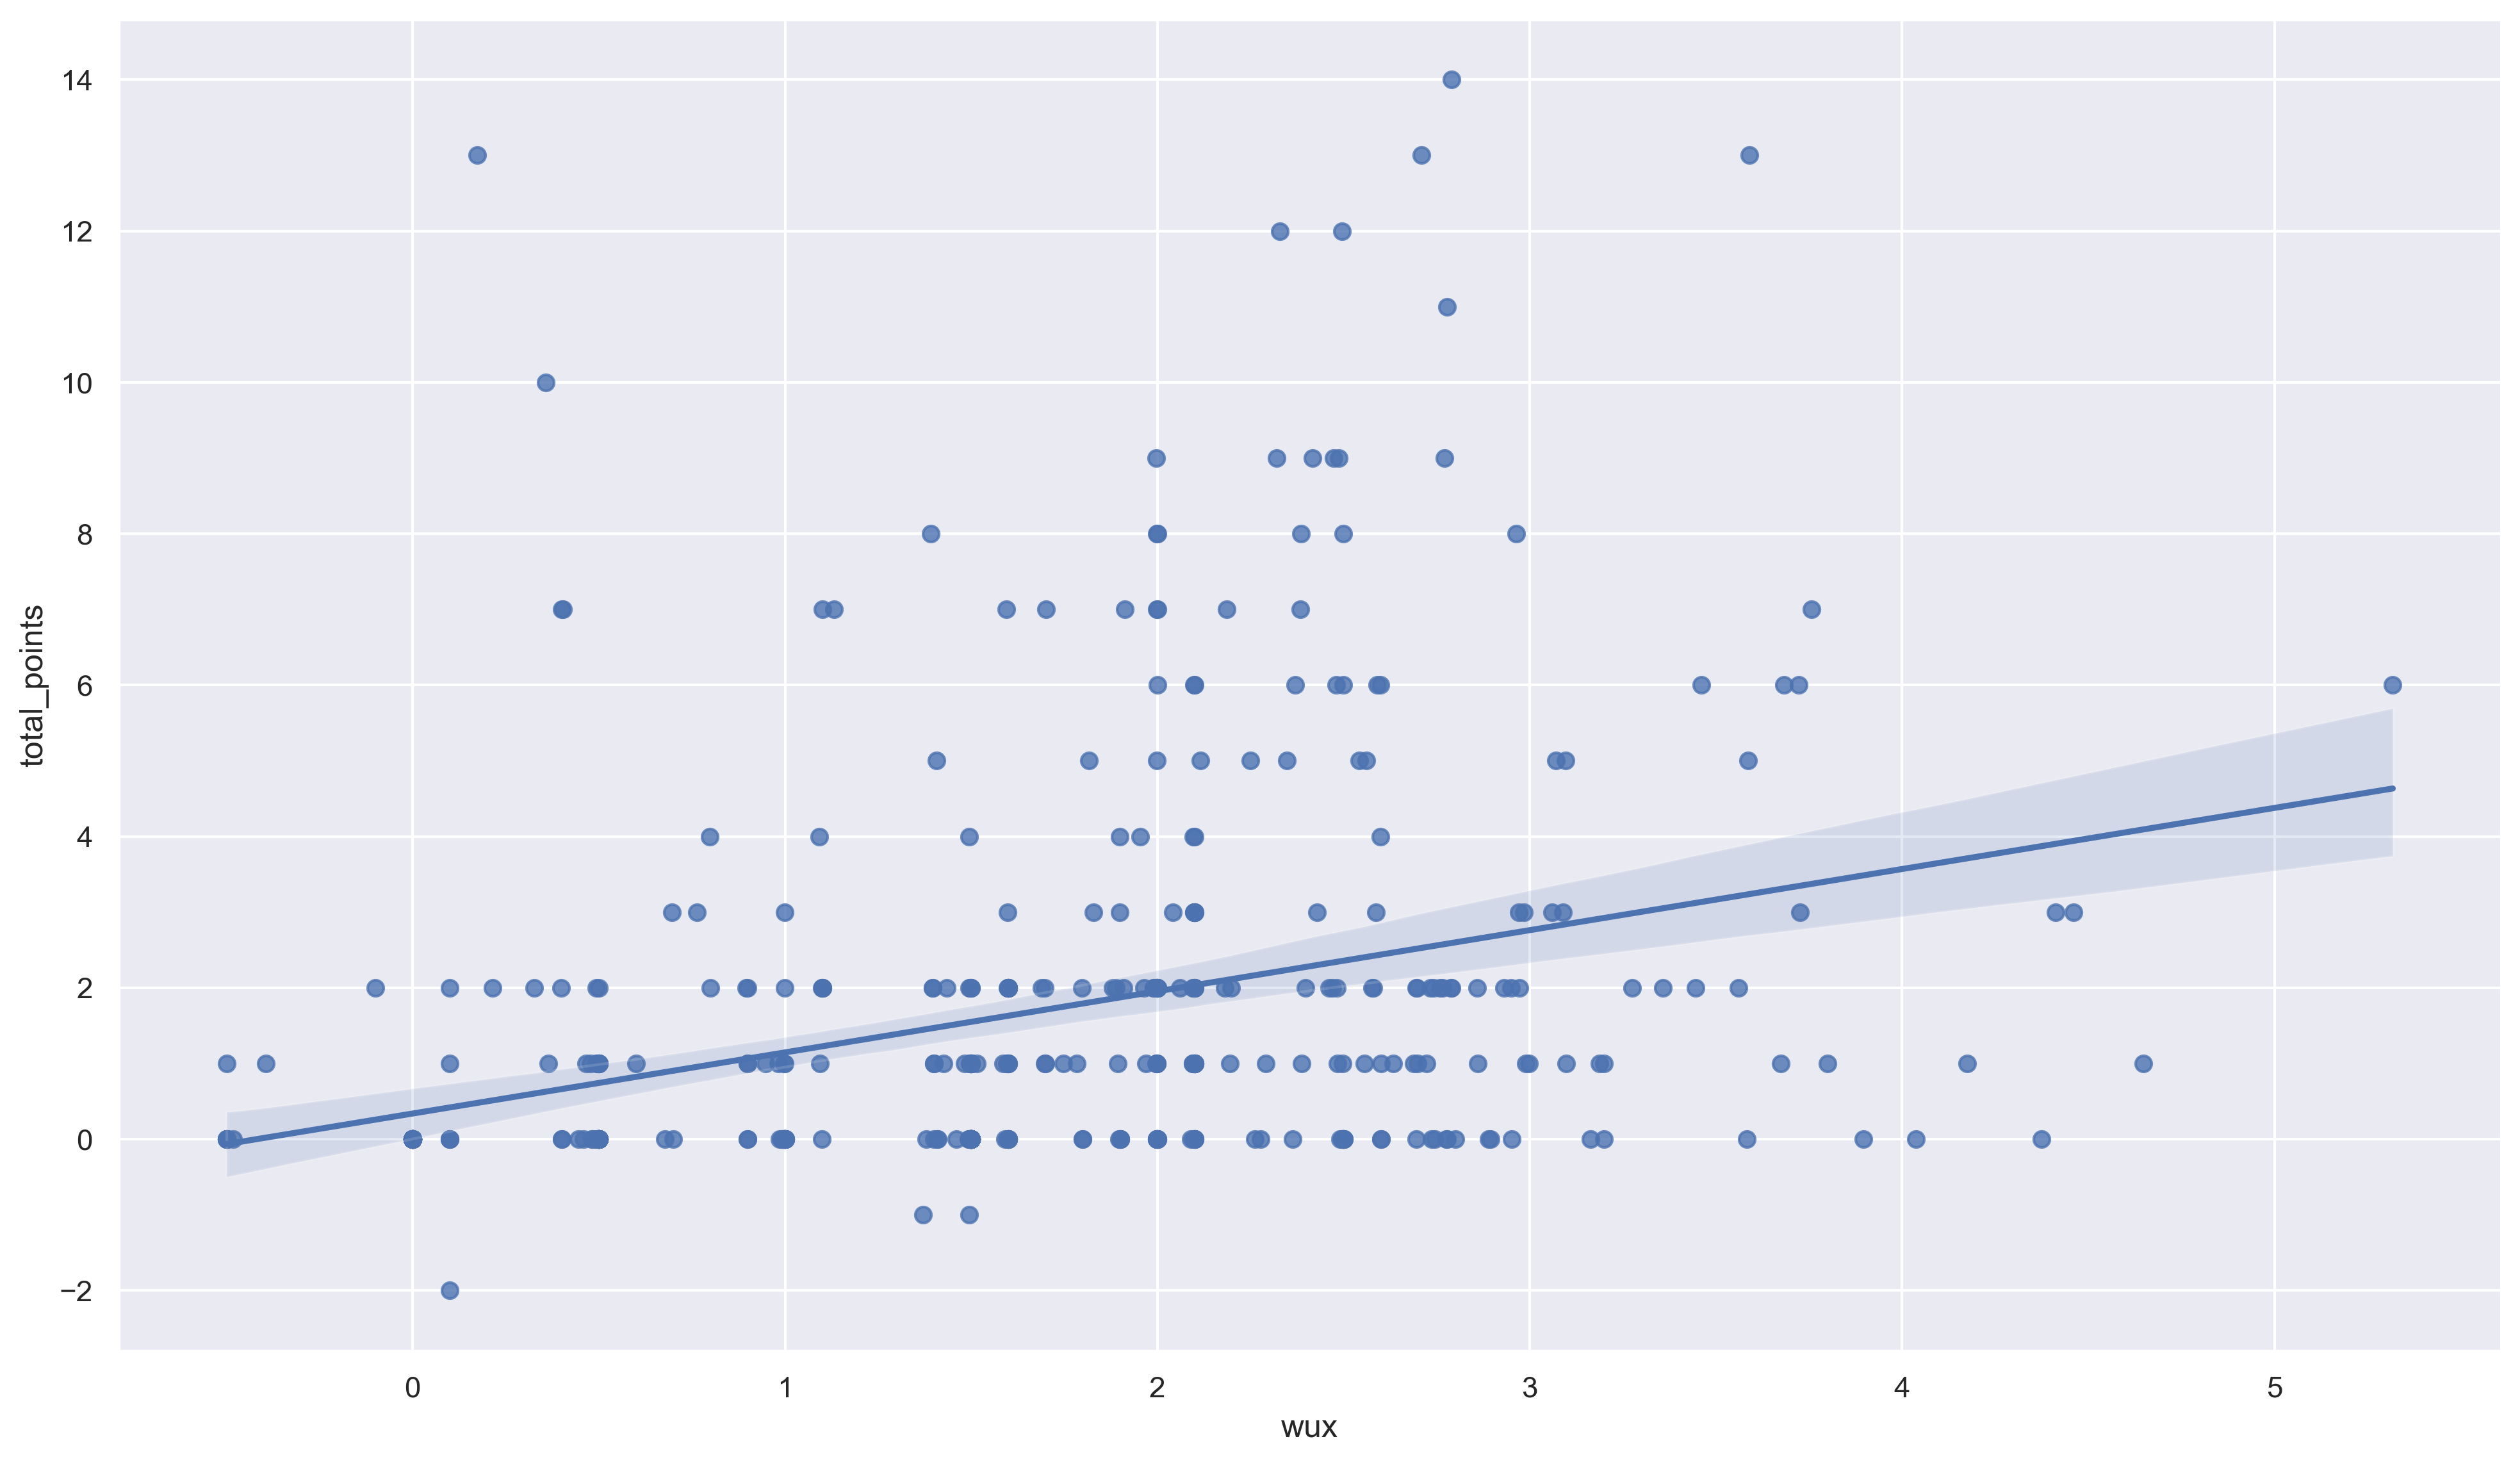

In [93]:
sns.regplot(data=df_test, x='wux', y='total_points')
slope, intercept, r_value, p_value, std_err = linregress(df_test['wux'], df_test['total_points'])
r_squared = r_value ** 2

print(f"R-squared value: {r_squared:.4f}")

plt.show()